In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
at=pd.read_csv("Air_Traffic_Passenger_Statistics.csv")
at.head()

Activity Period Operating Airline Operating Airline IATA Code  \
0           200507      ATA Airlines                          TZ   
1           200507      ATA Airlines                          TZ   
2           200507      ATA Airlines                          TZ   
3           200507       Air Canada                           AC   
4           200507       Air Canada                           AC   

  Published Airline Published Airline IATA Code    GEO Summary GEO Region  \
0      ATA Airlines                          TZ       Domestic         US   
1      ATA Airlines                          TZ       Domestic         US   
2      ATA Airlines                          TZ       Domestic         US   
3       Air Canada                           AC  International     Canada   
4       Air Canada                           AC  International     Canada   

  Activity Type Code Price Category Code    Terminal Boarding Area  \
0           Deplaned            Low Fare  Terminal 1             B   
1           Enplaned            Low Fare  Terminal 1             B   
2     Thru / Transit            Low Fare  Terminal 1             B   
3           Deplaned               Other  Terminal 1             B   
4           Enplaned               Other  Terminal 1             B   

   Passenger Count Adjusted Activity Type Code  Adjusted Passenger Count  \
0            27271                    Deplaned                     27271   
1            29131                    Enplaned                     29131   
2             5415          Thru / Transit * 2                     10830   
3            35156                    Deplaned                     35156   
4            34090                    Enplaned                     34090   

   Year Month  
0  2005  July  
1  2005  July  
2  2005  July  
3  2005  July  
4  2005  July

In [3]:
at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

In [4]:
at["Operating Airline IATA Code"].mode()

0    UA
Name: Operating Airline IATA Code, dtype: object

In [5]:
at["Operating Airline IATA Code"].replace(np.nan,"UA",inplace=True)

In [6]:
at["Operating Airline IATA Code"].isna().sum()

0

In [7]:
at["Published Airline IATA Code"].mode()

0    UA
Name: Published Airline IATA Code, dtype: object

In [8]:
at["Published Airline IATA Code"].replace(np.nan,"UA",inplace=True)

In [9]:
at["Published Airline IATA Code"].isna().sum()

0

In [10]:
at.isna().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Adjusted Activity Type Code    0
Adjusted Passenger Count       0
Year                           0
Month                          0
dtype: int64

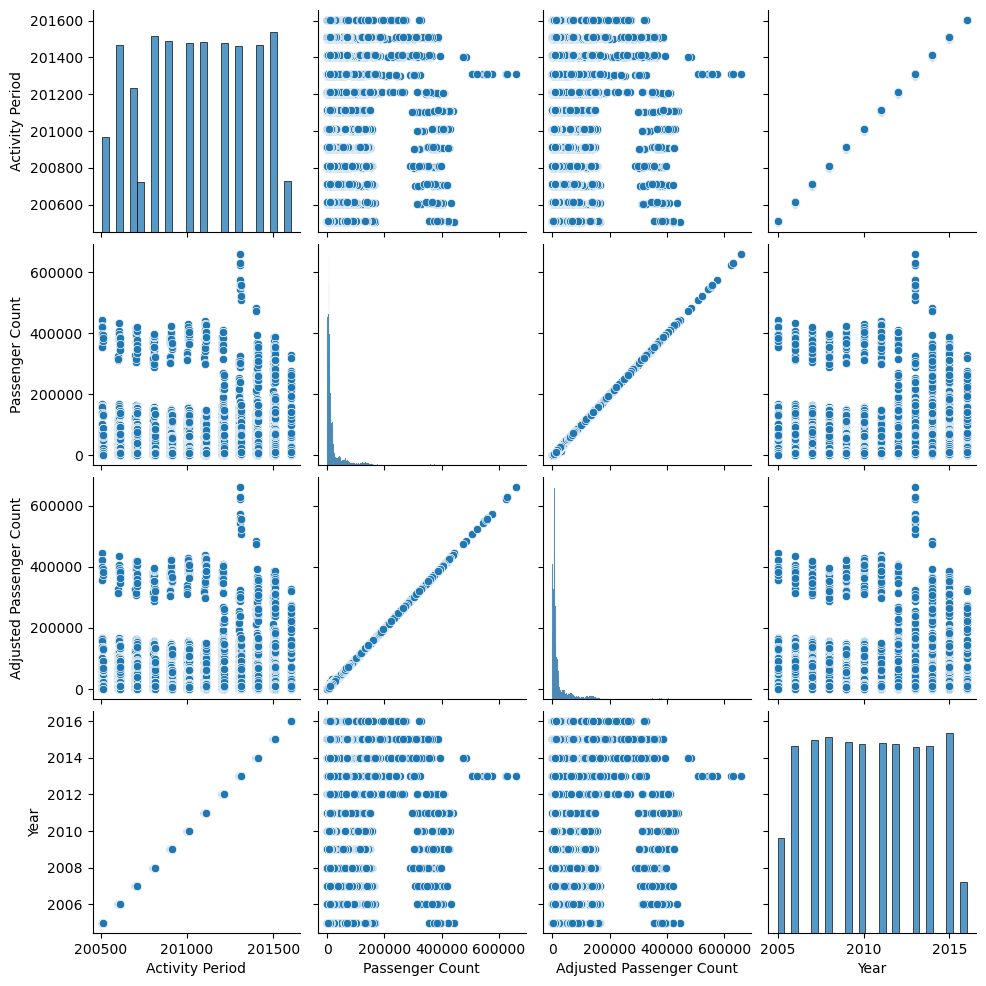

In [11]:
sns.pairplot(at)
plt.show()

In [12]:
from scipy.stats import skew
intcol=at.select_dtypes("int64").columns
intcol

Index(['Activity Period', 'Passenger Count', 'Adjusted Passenger Count',
       'Year'],
      dtype='object')

Activity Period
0.005277425987164216


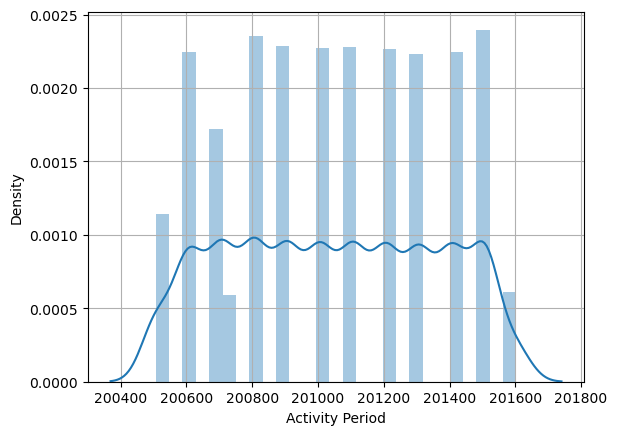

Passenger Count
4.3603199034139735


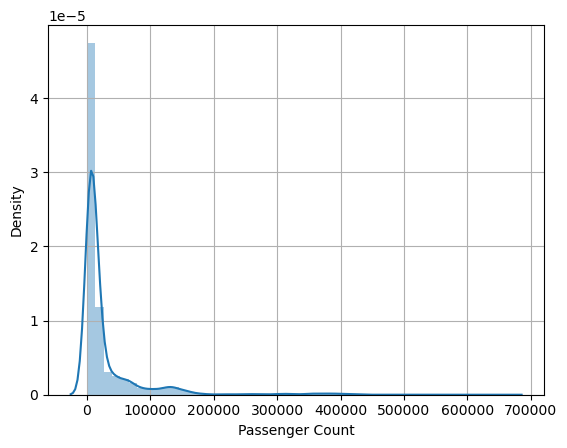

Adjusted Passenger Count
4.364279143574455


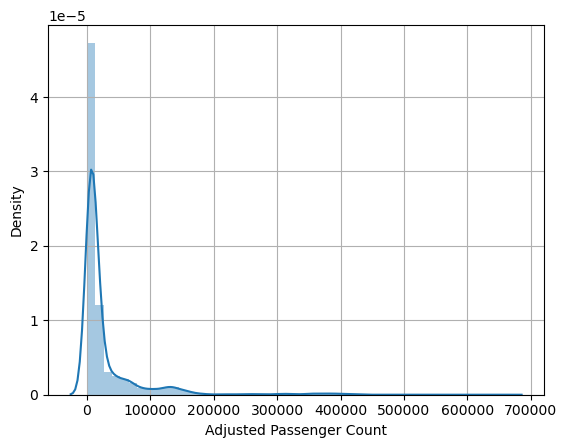

Year
0.004957949587778114


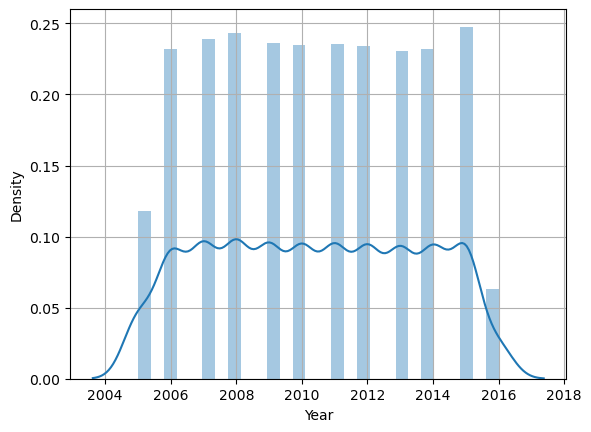

In [13]:
for i in intcol:
    print(i)
    print(skew(at[i]))
    plt.figure()
    sns.distplot(at[i])
    plt.grid()
    plt.show()

In [14]:
at.corr()

Activity Period  Passenger Count  \
Activity Period                  1.000000         0.060311   
Passenger Count                  0.060311         1.000000   
Adjusted Passenger Count         0.059336         0.999941   
Year                             0.999940         0.060069   

                          Adjusted Passenger Count      Year  
Activity Period                           0.059336  0.999940  
Passenger Count                           0.999941  0.060069  
Adjusted Passenger Count                  1.000000  0.059096  
Year                                      0.059096  1.000000

In [15]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [16]:
obcol=at.select_dtypes("object").columns
obcol

Index(['Operating Airline', 'Operating Airline IATA Code', 'Published Airline',
       'Published Airline IATA Code', 'GEO Summary', 'GEO Region',
       'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Adjusted Activity Type Code', 'Month'],
      dtype='object')

In [17]:
at[obcol]=oe.fit_transform(at[obcol])
at.head()

Activity Period  Operating Airline  Operating Airline IATA Code  \
0           200507                0.0                         60.0   
1           200507                0.0                         60.0   
2           200507                0.0                         60.0   
3           200507                4.0                          6.0   
4           200507                4.0                          6.0   

   Published Airline  Published Airline IATA Code  GEO Summary  GEO Region  \
0                0.0                         54.0          0.0         8.0   
1                0.0                         54.0          0.0         8.0   
2                0.0                         54.0          0.0         8.0   
3                4.0                          6.0          1.0         2.0   
4                4.0                          6.0          1.0         2.0   

   Activity Type Code  Price Category Code  Terminal  Boarding Area  \
0                 0.0                  0.0       2.0            1.0   
1                 1.0                  0.0       2.0            1.0   
2                 2.0                  0.0       2.0            1.0   
3                 0.0                  1.0       2.0            1.0   
4                 1.0                  1.0       2.0            1.0   

   Passenger Count  Adjusted Activity Type Code  Adjusted Passenger Count  \
0            27271                          0.0                     27271   
1            29131                          1.0                     29131   
2             5415                          2.0                     10830   
3            35156                          0.0                     35156   
4            34090                          1.0                     34090   

   Year  Month  
0  2005    5.0  
1  2005    5.0  
2  2005    5.0  
3  2005    5.0  
4  2005    5.0

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
att=sc.fit_transform(at)

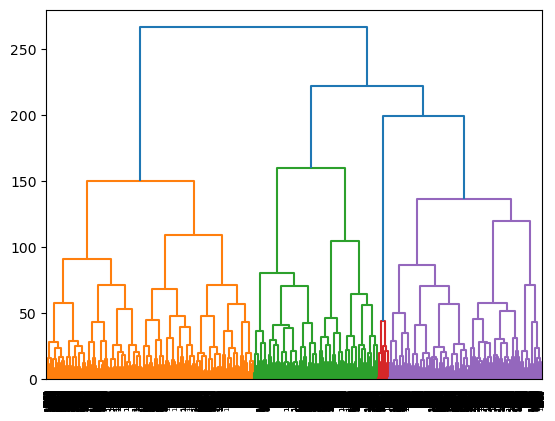

In [19]:
from scipy.cluster import hierarchy as hi

lk=hi.linkage(att,method="ward")
ddg=hi.dendrogram(lk)
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4)
ylabel=hc.fit_predict(att)

In [22]:
at["op"]=ylabel

In [23]:
at["op"].value_counts()

1    6292
2    4628
0    3756
3     331
Name: op, dtype: int64

In [24]:
at.head(10)

Activity Period  Operating Airline  Operating Airline IATA Code  \
0           200507                0.0                         60.0   
1           200507                0.0                         60.0   
2           200507                0.0                         60.0   
3           200507                4.0                          6.0   
4           200507                4.0                          6.0   
5           200507                6.0                         15.0   
6           200507                6.0                         15.0   
7           200507                7.0                          7.0   
8           200507                7.0                          7.0   
9           200507                9.0                         46.0   

   Published Airline  Published Airline IATA Code  GEO Summary  GEO Region  \
0                0.0                         54.0          0.0         8.0   
1                0.0                         54.0          0.0         8.0   
2                0.0                         54.0          0.0         8.0   
3                4.0                          6.0          1.0         2.0   
4                4.0                          6.0          1.0         2.0   
5                5.0                         15.0          1.0         0.0   
6                5.0                         15.0          1.0         0.0   
7                6.0                          7.0          1.0         4.0   
8                6.0                          7.0          1.0         4.0   
9                8.0                         43.0          1.0         1.0   

   Activity Type Code  Price Category Code  Terminal  Boarding Area  \
0                 0.0                  0.0       2.0            1.0   
1                 1.0                  0.0       2.0            1.0   
2                 2.0                  0.0       2.0            1.0   
3                 0.0                  1.0       2.0            1.0   
4                 1.0                  1.0       2.0            1.0   
5                 0.0                  1.0       0.0            6.0   
6                 1.0                  1.0       0.0            6.0   
7                 0.0                  1.0       0.0            0.0   
8                 1.0                  1.0       0.0            0.0   
9                 0.0                  1.0       0.0            6.0   

   Passenger Count  Adjusted Activity Type Code  Adjusted Passenger Count  \
0            27271                          0.0                     27271   
1            29131                          1.0                     29131   
2             5415                          2.0                     10830   
3            35156                          0.0                     35156   
4            34090                          1.0                     34090   
5             6263                          0.0                      6263   
6             5500                          1.0                      5500   
7            12050                          0.0                     12050   
8            11638                          1.0                     11638   
9             4998                          0.0                      4998   

   Year  Month  op  
0  2005    5.0   0  
1  2005    5.0   0  
2  2005    5.0   0  
3  2005    5.0   1  
4  2005    5.0   1  
5  2005    5.0   1  
6  2005    5.0   1  
7  2005    5.0   1  
8  2005    5.0   1  
9  2005    5.0   1

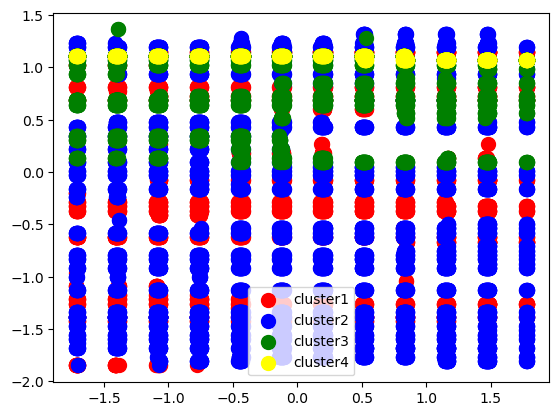

In [33]:
plt.scatter(att[ylabel==0,0],att[ylabel==0,1],s=100,c="red",label="cluster1")
plt.scatter(att[ylabel==1,0],att[ylabel==1,1],s=100,c="blue",label="cluster2")
plt.scatter(att[ylabel==2,0],att[ylabel==2,1],s=100,c="green",label="cluster3")
plt.scatter(att[ylabel==3,0],att[ylabel==3,1],s=100,c="yellow",label="cluster4")

plt.legend()
plt.show()

In [34]:
x=at.iloc[:,:-1]
x

Activity Period  Operating Airline  Operating Airline IATA Code  \
0               200507                0.0                         60.0   
1               200507                0.0                         60.0   
2               200507                0.0                         60.0   
3               200507                4.0                          6.0   
4               200507                4.0                          6.0   
...                ...                ...                          ...   
15002           201603               71.0                         64.0   
15003           201603               71.0                         64.0   
15004           201603               71.0                         64.0   
15005           201603               72.0                         63.0   
15006           201603               72.0                         63.0   

       Published Airline  Published Airline IATA Code  GEO Summary  \
0                    0.0                         54.0          0.0   
1                    0.0                         54.0          0.0   
2                    0.0                         54.0          0.0   
3                    4.0                          6.0          1.0   
4                    4.0                          6.0          1.0   
...                  ...                          ...          ...   
15002               62.0                         58.0          0.0   
15003               62.0                         58.0          1.0   
15004               62.0                         58.0          1.0   
15005               63.0                         57.0          1.0   
15006               63.0                         57.0          1.0   

       GEO Region  Activity Type Code  Price Category Code  Terminal  \
0             8.0                 0.0                  0.0       2.0   
1             8.0                 1.0                  0.0       2.0   
2             8.0                 2.0                  0.0       2.0   
3             2.0                 0.0                  1.0       2.0   
4             2.0                 1.0                  1.0       2.0   
...           ...                 ...                  ...       ...   
15002         8.0                 1.0                  0.0       3.0   
15003         5.0                 0.0                  0.0       0.0   
15004         5.0                 1.0                  0.0       3.0   
15005         4.0                 0.0                  1.0       0.0   
15006         4.0                 1.0                  1.0       0.0   

       Boarding Area  Passenger Count  Adjusted Activity Type Code  \
0                1.0            27271                          0.0   
1                1.0            29131                          1.0   
2                1.0             5415                          2.0   
3                1.0            35156                          0.0   
4                1.0            34090                          1.0   
...              ...              ...                          ...   
15002            3.0           194636                          1.0   
15003            0.0             4189                          0.0   
15004            3.0             4693                          1.0   
15005            0.0            12313                          0.0   
15006            0.0            10898                          1.0   

       Adjusted Passenger Count  Year  Month  
0                         27271  2005    5.0  
1                         29131  2005    5.0  
2                         10830  2005    5.0  
3                         35156  2005    5.0  
4                         34090  2005    5.0  
...                         ...   ...    ...  
15002                    194636  2016    7.0  
15003                      4189  2016    7.0  
15004                      4693  2016    7.0  
15005                     12313  2016    7.0  
15006                     10898  2016    7.0  

[15007

In [35]:
y=at.iloc[:,-1]
y

0        0
1        0
2        0
3        1
4        1
        ..
15002    0
15003    0
15004    0
15005    1
15006    1
Name: op, Length: 15007, dtype: int64

In [131]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=3)

In [132]:
def mymod(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    
    print(f"Training Accuracy:{train}\nTesting Accuracy:{test}\n\n")
    print(classification_report(ytest,ypred))
    return model

In [133]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [134]:
dt=mymod(DecisionTreeClassifier())

Training Accuracy:1.0
Testing Accuracy:0.9937819231623363


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1146
           1       0.99      0.99      0.99      1890
           2       0.99      0.99      0.99      1380
           3       1.00      1.00      1.00        87

    accuracy                           0.99      4503
   macro avg       1.00      1.00      1.00      4503
weighted avg       0.99      0.99      0.99      4503



In [135]:
knn=mymod(KNeighborsClassifier())

Training Accuracy:0.7647562833206397
Testing Accuracy:0.6608927381745503


              precision    recall  f1-score   support

           0       0.55      0.53      0.54      1146
           1       0.68      0.80      0.74      1890
           2       0.69      0.56      0.62      1380
           3       0.99      1.00      0.99        87

    accuracy                           0.66      4503
   macro avg       0.73      0.72      0.72      4503
weighted avg       0.66      0.66      0.66      4503



In [136]:
nb=mymod(GaussianNB())

Training Accuracy:0.7658035034272658
Testing Accuracy:0.7692649344881191


              precision    recall  f1-score   support

           0       0.82      0.42      0.56      1146
           1       0.77      0.89      0.83      1890
           2       0.75      0.88      0.81      1380
           3       0.69      1.00      0.82        87

    accuracy                           0.77      4503
   macro avg       0.76      0.80      0.75      4503
weighted avg       0.78      0.77      0.75      4503



In [137]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [138]:
svm=mymod(SVC())

Training Accuracy:0.5508377760853008
Testing Accuracy:0.549189429269376


              precision    recall  f1-score   support

           0       0.81      0.19      0.31      1146
           1       0.52      1.00      0.68      1890
           2       0.54      0.21      0.30      1380
           3       1.00      0.97      0.98        87

    accuracy                           0.55      4503
   macro avg       0.72      0.59      0.57      4503
weighted avg       0.61      0.55      0.48      4503



In [139]:
lr=mymod(LogisticRegression())

Training Accuracy:0.745049504950495
Testing Accuracy:0.746613368865201


              precision    recall  f1-score   support

           0       0.79      0.36      0.50      1146
           1       0.74      0.87      0.80      1890
           2       0.73      0.87      0.80      1380
           3       0.99      1.00      0.99        87

    accuracy                           0.75      4503
   macro avg       0.81      0.78      0.77      4503
weighted avg       0.75      0.75      0.73      4503

